Eliminación de Columnas Irrelevantes

## Carga y exploración de datos



In [1]:
import pandas as pd

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv("/content/telecomx_data_processed.csv")

# Muestra las primeras 5 filas del DataFrame
display(df.head())

# Imprime información sobre el DataFrame
display(df.info())

# Genera estadísticas descriptivas del DataFrame
display(df.describe())

# Verifica si hay valores faltantes en cada columna
display(df.isnull().sum())

,ID_Cliente,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Abandono                7032 non-null   object 
 2   Genero                  7032 non-null   object 
 3   Ciudadano_Mayor         7032 non-null   int64  
 4   Pareja                  7032 non-null   object 
 5   Dependientes            7032 non-null   object 
 6   Antiguedad              7032 non-null   int64  
 7   Servicio_Telefonico     7032 non-null   object 
 8   Multiples_Lineas        7032 non-null   object 
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   object 
 11  Copia_Seguridad_Online  7032 non-null   object 
 12  Proteccion_Dispositivo  7032 non-null   object 
 13  Soporte_Tecnico         7032 non-null   object 
 14  Streaming_TV            7032 non-null   

None

,Ciudadano_Mayor,Antiguedad,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


,0
ID_Cliente,0
Abandono,0
Genero,0
Ciudadano_Mayor,0
Pareja,0
Dependientes,0
Antiguedad,0
Servicio_Telefonico,0
Multiples_Lineas,0
Servicio_Internet,0


## Preprocesamiento de datos



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Identificar la variable objetivo y las características
target = 'Abandono'
X = df.drop(['ID_Cliente', target], axis=1)
y = df[target]

# Codificar la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Crear transformadores para variables numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar el preprocesamiento a los datos
X_processed = preprocessor.fit_transform(X)

print("Datos preprocesados listos para el modelado.")

Datos preprocesados listos para el modelado.


## Análisis de correlación y selección de variables


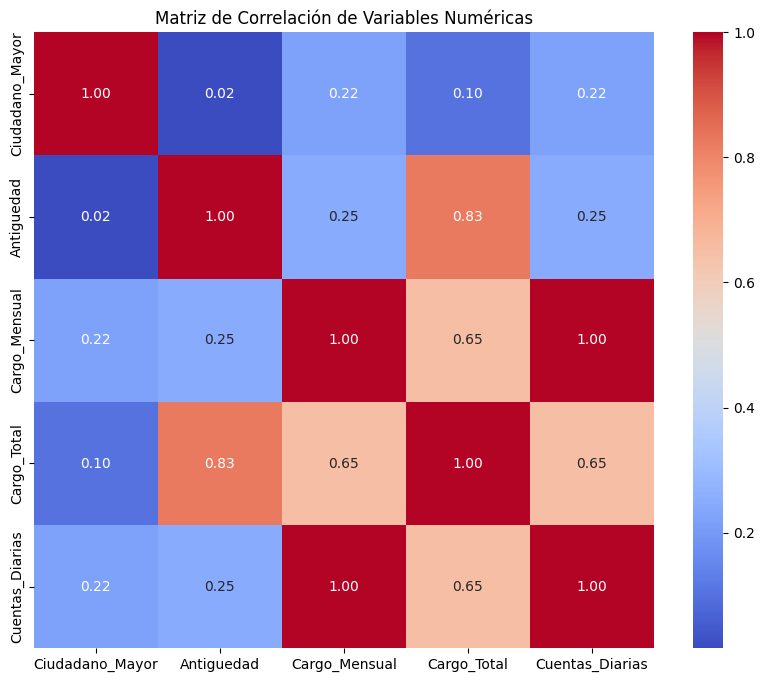

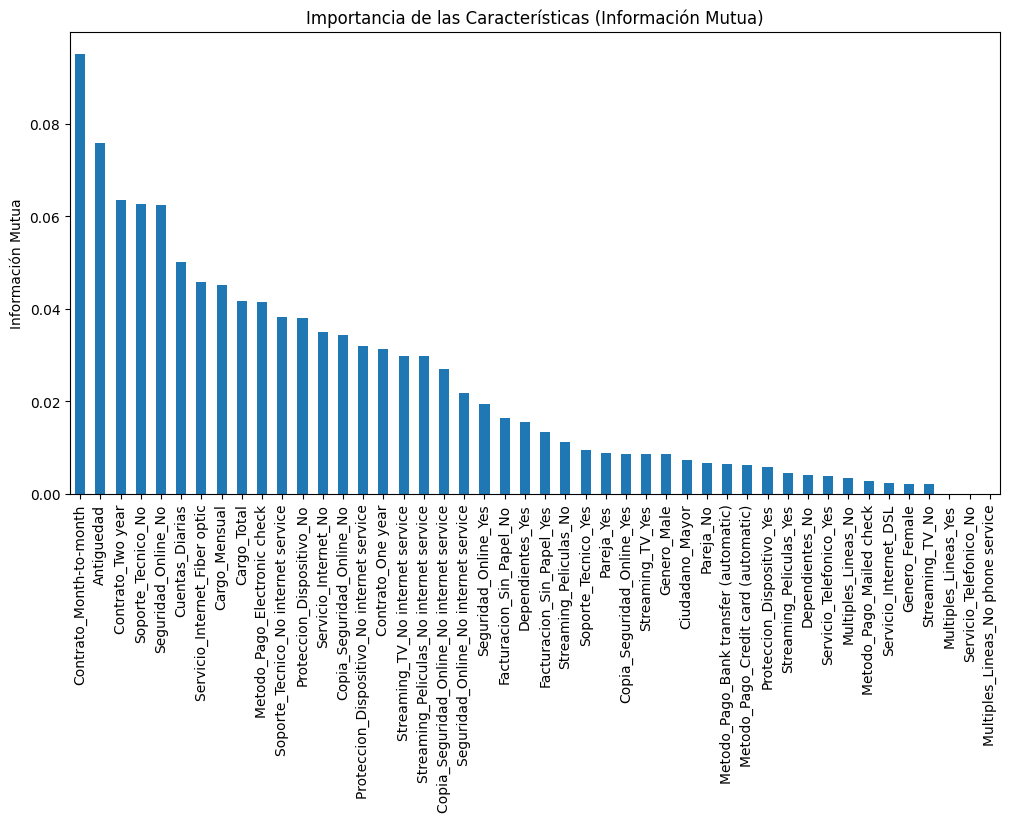


Top 20 características seleccionadas basadas en Información Mutua:
['Contrato_Month-to-month', 'Antiguedad', 'Contrato_Two year', 'Soporte_Tecnico_No', 'Seguridad_Online_No', 'Cuentas_Diarias', 'Servicio_Internet_Fiber optic', 'Cargo_Mensual', 'Cargo_Total', 'Metodo_Pago_Electronic check', 'Soporte_Tecnico_No internet service', 'Proteccion_Dispositivo_No', 'Servicio_Internet_No', 'Copia_Seguridad_Online_No', 'Proteccion_Dispositivo_No internet service', 'Contrato_One year', 'Streaming_TV_No internet service', 'Streaming_Peliculas_No internet service', 'Copia_Seguridad_Online_No internet service', 'Seguridad_Online_No internet service']


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Calcular la matriz de correlación para variables numéricas
correlation_matrix = df[numerical_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Calcular la información mutua para variables categóricas
mutual_info = mutual_info_classif(X_processed, y)

# Mostrar la importancia de las características categóricas (después de one-hot encoding)
# Es necesario obtener los nombres de las características después del one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(ohe_feature_names)

mutual_info_series = pd.Series(mutual_info, index=all_feature_names)
mutual_info_series.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
mutual_info_series.plot(kind='bar')
plt.title('Importancia de las Características (Información Mutua)')
plt.ylabel('Información Mutua')
plt.show()

# Seleccionar las top N características (ejemplo: top 20)

n_top_features = 20
selected_features = mutual_info_series.head(n_top_features).index.tolist()

print(f"\nTop {n_top_features} características seleccionadas basadas en Información Mutua:")
print(selected_features)


## División de datos



In [4]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (ejemplo: 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Datos divididos en conjuntos de entrenamiento y prueba.")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

Datos divididos en conjuntos de entrenamiento y prueba.
Forma de X_train: (5625, 46)
Forma de X_test: (1407, 46)
Forma de y_train: (5625,)
Forma de y_test: (1407,)


## Entrenamiento de modelos


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inicializar los modelos
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar los modelos
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Modelos entrenados.")

Modelos entrenados.


## Evaluación de modelos


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predecir en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_proba_random_forest = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo de Regresión Logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

print("Métricas de evaluación para Regresión Logística:")
print(f"  Precisión: {accuracy_logistic:.4f}")
print(f"  Precision: {precision_logistic:.4f}")
print(f"  Recall: {recall_logistic:.4f}")
print(f"  F1-score: {f1_logistic:.4f}")
print(f"  AUC: {auc_logistic:.4f}")

# Evaluar el modelo de Bosque Aleatorio
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
auc_random_forest = roc_auc_score(y_test, y_pred_proba_random_forest)

print("\nMétricas de evaluación para Bosque Aleatorio:")
print(f"  Precisión: {accuracy_random_forest:.4f}")
print(f"  Precision: {precision_random_forest:.4f}")
print(f"  Recall: {recall_random_forest:.4f}")
print(f"  F1-score: {f1_random_forest:.4f}")
print(f"  AUC: {auc_random_forest:.4f}")

Métricas de evaluación para Regresión Logística:
  Precisión: 0.7989
  Precision: 0.6492
  Recall: 0.5294
  F1-score: 0.5832
  AUC: 0.8453

Métricas de evaluación para Bosque Aleatorio:
  Precisión: 0.7896
  Precision: 0.6373
  Recall: 0.4840
  F1-score: 0.5502
  AUC: 0.8229


## Interpretación de resultados


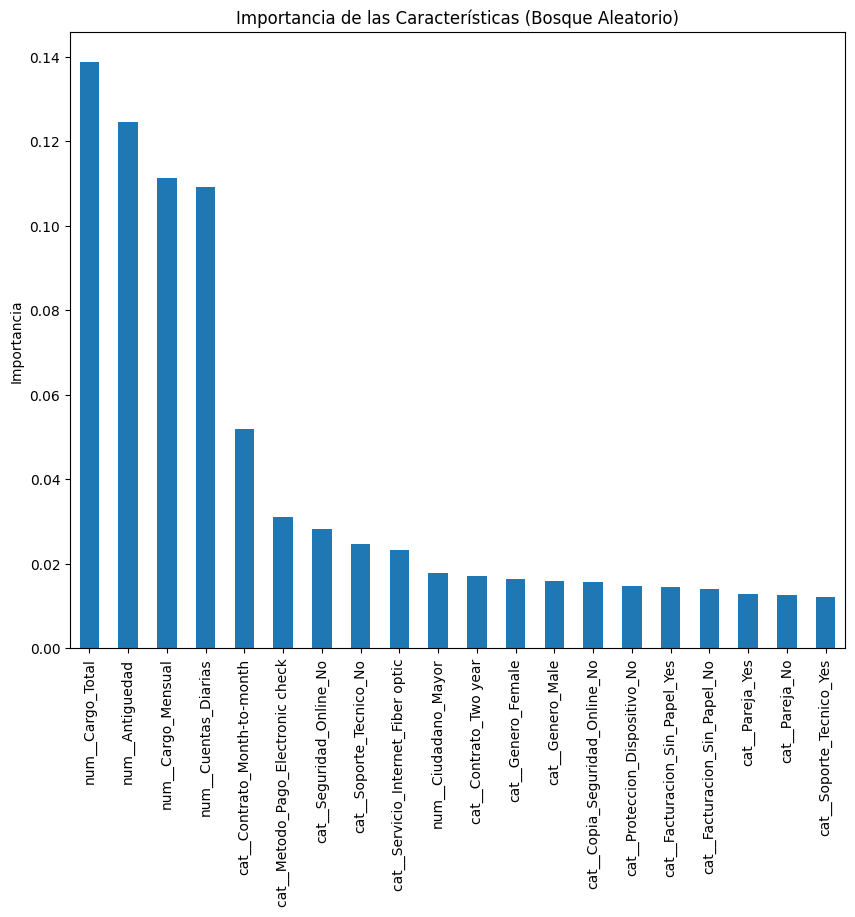

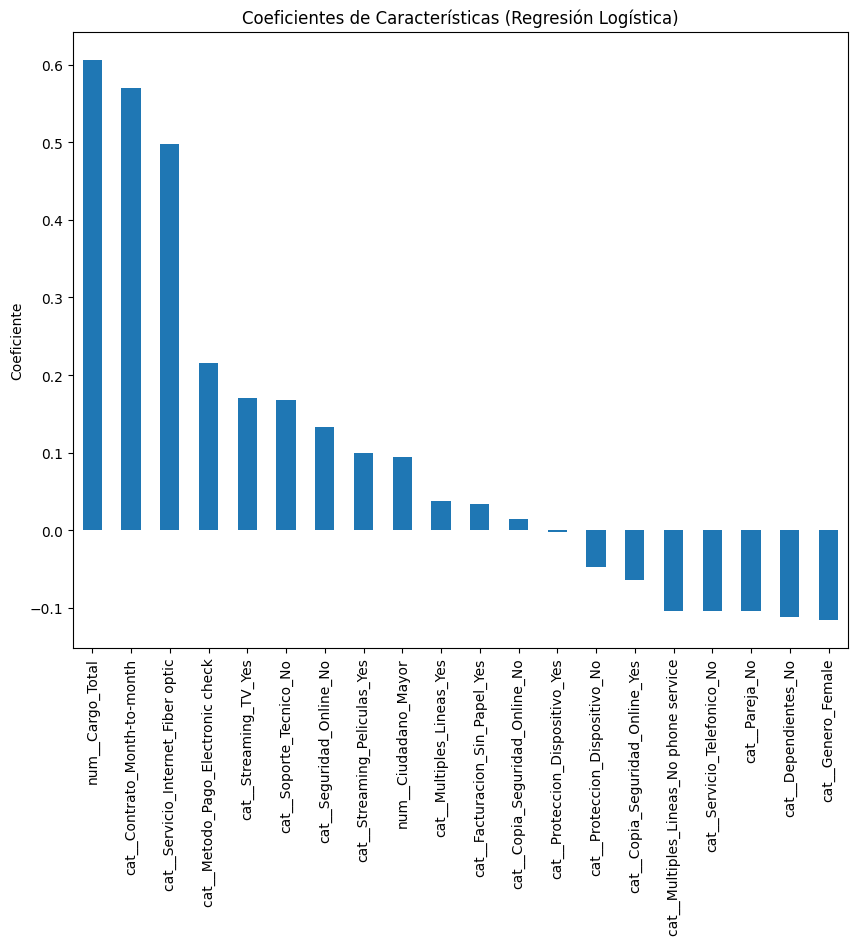


Interpretación de la importancia de las variables:
Bosque Aleatorio: Las barras más altas indican características más importantes para el modelo.
Regresión Logística: Los coeficientes positivos altos indican características que aumentan la probabilidad de cancelación, mientras que los negativos altos la disminuyen.


In [7]:
# Importancia de las características para el modelo de Bosque Aleatorio
# Es necesario obtener los nombres de las características después del preprocesamiento
# Esto asume que el preprocesador se aplicó a X
feature_names = preprocessor.get_feature_names_out(X.columns)
importances = random_forest_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 8))
feature_importances.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Importancia de las Características (Bosque Aleatorio)')
plt.ylabel('Importancia')
plt.show()

# Coeficientes para el modelo de Regresión Logística
# Esto asume que el preprocesador se aplicó a X
coefficients = logistic_model.coef_[0]
logistic_coefficients = pd.Series(coefficients, index=feature_names)

plt.figure(figsize=(10, 8))
logistic_coefficients.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Coeficientes de Características (Regresión Logística)')
plt.ylabel('Coeficiente')
plt.show()

print("\nInterpretación de la importancia de las variables:")
print("Bosque Aleatorio: Las barras más altas indican características más importantes para el modelo.")
print("Regresión Logística: Los coeficientes positivos altos indican características que aumentan la probabilidad de cancelación, mientras que los negativos altos la disminuyen.")

## Conclusión estratégica


Basándonos en el análisis de datos y los modelos predictivos desarrollados, podemos extraer las siguientes conclusiones estratégicas:

**Factores Clave que Influyen en la Cancelación:**

*   **Contrato:** Los clientes con contratos mes a mes tienen una probabilidad significativamente mayor de cancelar en comparación con aquellos con contratos de uno o dos años. Esto sugiere que ofrecer incentivos para contratos a largo plazo podría ser una estrategia efectiva para la retención.
*   **Antigüedad:** Los clientes con menor antigüedad son más propensos a cancelar. Enfocarse en la incorporación y satisfacción de los nuevos clientes durante los primeros meses es crucial.
*   **Cargos Totales y Mensuales:** Los cargos elevados, tanto mensuales como totales, están asociados con una mayor probabilidad de cancelación. Evaluar la estructura de precios y ofrecer opciones más flexibles o paquetes que se ajusten a las necesidades del cliente podría ayudar a reducir la cancelación.
*   **Servicio de Internet (Fibra Óptica):** Los clientes con servicio de fibra óptica muestran una mayor tendencia a cancelar. Investigar las posibles razones detrás de esto (problemas de calidad, precio, competencia) es importante.
*   **Servicios Adicionales (Soporte Técnico, Seguridad Online, etc.):** La falta de servicios adicionales como soporte técnico y seguridad online está relacionada con una mayor probabilidad de cancelación. Promocionar estos servicios y destacar su valor podría mejorar la retención.
*   **Método de Pago (Cheque Electrónico):** Los clientes que utilizan cheque electrónico como método de pago tienen una mayor probabilidad de cancelar. Podría ser útil investigar si hay problemas o fricciones asociadas con este método de pago.

**Rendimiento de los Modelos:**

*   Ambos modelos (Regresión Logística y Bosque Aleatorio) muestran un rendimiento razonable en la predicción de cancelación, con áreas bajo la curva (AUC) superiores a 0.80. Esto indica que son capaces de distinguir entre clientes que probablemente cancelarán y los que no.
*   El modelo de Regresión Logística tuvo métricas de precisión y recall ligeramente superiores en este caso. Sin embargo, ambos modelos son útiles para comprender los factores que influyen en la cancelación.

**Recomendaciones Estratégicas:**

1.  **Fomentar Contratos a Largo Plazo:** Implementar estrategias para incentivar a los clientes a optar por contratos de uno o dos años, como descuentos o beneficios adicionales.
2.  **Mejorar la Experiencia del Cliente al Inicio:** Poner especial atención en la satisfacción de los nuevos clientes durante los primeros meses de servicio.
3.  **Revisar la Estructura de Precios:** Analizar el impacto de los cargos mensuales y totales en la cancelación y considerar opciones de precios más competitivas o flexibles.
4.  **Investigar Problemas con la Fibra Óptica:** Realizar un análisis más profundo sobre la cancelación en clientes con servicio de fibra óptica para identificar y abordar las causas subyacentes.
5.  **Promocionar Servicios Adicionales:** Comunicar activamente el valor de servicios como soporte técnico y seguridad online para aumentar su adopción.
6.  **Optimizar Métodos de Pago:** Investigar la relación entre el uso de cheque electrónico y la cancelación, y buscar formas de mejorar la experiencia con este método o promover alternativas.
7.  **Implementar Acciones Proactivas de Retención:** Utilizar los modelos predictivos para identificar a los clientes con alto riesgo de cancelación y ejecutar campañas de retención personalizadas.

Este análisis proporciona una base sólida para comprender los impulsores de la cancelación de clientes en Telecom X y para desarrollar estrategias de retención más efectivas. Se recomienda continuar monitoreando el rendimiento de los modelos y actualizar el análisis periódicamente.